In [1]:
import numpy as np
from test import test
from util import inverse_decay
import matplotlib.pyplot as plt
import visualize
from stats import *
from agents import *

In [2]:
topics = np.array([[-1, 1]])

In [3]:
first_param = 'num_agents'
first_param_legend_label = 'Number of Agents'
first_param_x_label = 'Number of Agents'
first_param_values = first_param_values = [2, 5, 10, 20]

In [4]:
second_param = 'agent_topic_interest_func'
second_param_legend_label = 'Agent Topic Interest Function Shallowness'
second_param_x_label = 'Agent Topic Interest Function Shallowness'
second_param_values = [0.01, 0.1, 1, 5, 10]

def get_func(val):
    return lambda x: inverse_decay(x, val, 2)

funcs = [get_func(val) for val in second_param_values]

In [5]:
num_influencers = 1

In [6]:
test_imperfect = True

In [7]:
first_param_stats = {}

for first_param_value in first_param_values:
    perfect_info_stats, imperfect_info_stats = test(
        topics=topics,
        varied_param=second_param,
        num_influencers=num_influencers,
        num_agents=10,
        producer_topic_interest_func=None,
        consumer_topic_interest_func=None,
        agent_topic_interest_func=funcs,
        consumer_attention_bound=10,
        consumer_external_interest_prob=3,
        consumer_delay_sensitivity=1,
        influencer_attention_bound=first_param_value,
        influencer_delay_sensitivity=1,
        init_following_rates_method='equal',
        init_interest_method='even',
        init_topic_produced_method='main',
        production_rate=1,
        external_production_rate=1,
        use_imperfect_information=test_imperfect,
        delay_sensitivity=None,
    )
    first_param_stats[first_param_value] = {
        'perfect': perfect_info_stats,
        'imperfect': imperfect_info_stats
    }

Optimizing consumer 0
Optimizing consumer 1
Optimizing consumer 2
Optimizing consumer 3
Optimizing consumer 4


Optimizing consumer 5
Optimizing consumer 6
Optimizing consumer 7
Optimizing consumer 8
Optimizing consumer 9
Optimizing influencer 10
Optimizing producer 0
Optimization succeeded (overall 0.009674625005573034s): nit=4, nfev=14, njev=7.
Optimizing producer 1
Optimization succeeded (overall 0.005315665854141116s): nit=3, nfev=10, njev=5.
Optimizing producer 2
Optimization succeeded (overall 0.0041905418038368225s): nit=2, nfev=8, njev=4.
Optimizing producer 3
Optimization succeeded (overall 0.004319249885156751s): nit=2, nfev=8, njev=4.
Optimizing producer 4
Optimization succeeded (overall 0.003019666997715831s): nit=2, nfev=8, njev=4.
Optimizing producer 5
Optimization succeeded (overall 0.002709458814933896s): nit=2, nfev=8, njev=4.
Optimizing producer 6
Optimization succeeded (overall 0.0024946248158812523s): nit=2, nfev=8, njev=4.
Optimizing producer 7
Optimization succeeded (overall 0.002512916922569275s): nit=2, nfev=8, njev=4.
Optimizing producer 8
Optimization succeeded (overall

In [8]:
second_param_stats = {}
for i in range(len(second_param_values)):
    second_param_value = second_param_values[i]
    second_param_stats[second_param_value] = {
        'perfect': [first_param_stats[first_param_value]['perfect'][i] for first_param_value in first_param_values],
        'imperfect': [first_param_stats[first_param_value]['imperfect'][i] for first_param_value in first_param_values]
    }

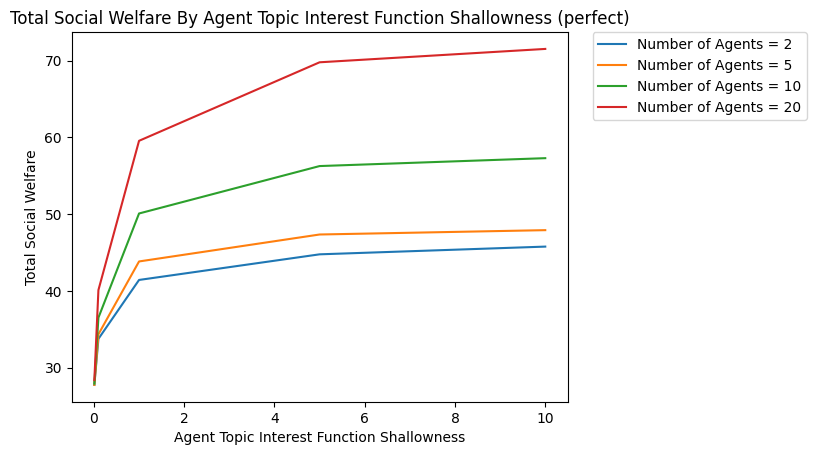

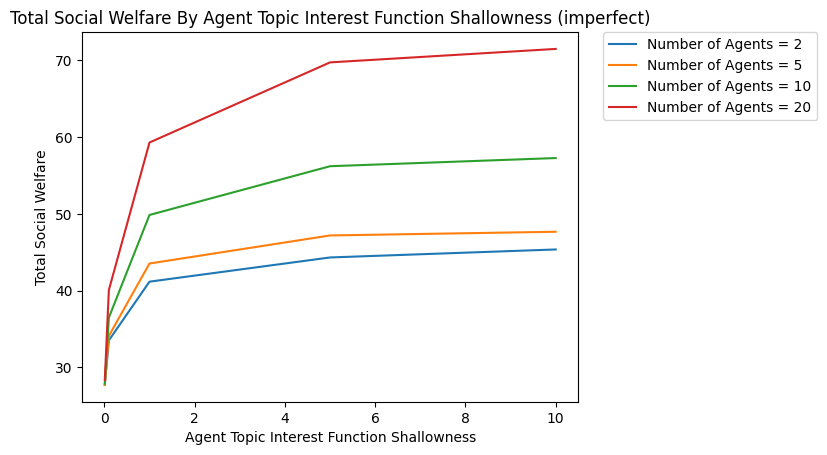

In [9]:
plt.figure()
for first_param_value in first_param_values:
    perfect_info_stats: list[TestStats] = first_param_stats[first_param_value]['perfect']
    #imperfect_info_stats = stats[first_param_value]['imperfect']
    plt.title(f'Total Social Welfare By {second_param_x_label} (perfect)')
    plt.xlabel(second_param_x_label)
    plt.ylabel('Total Social Welfare')
    perfect_social_welfares = [test.total_social_welfare[-1] for test in perfect_info_stats]
    plt.plot(second_param_values, perfect_social_welfares, label=f'{first_param_legend_label} = {first_param_value}')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

if test_imperfect:
    plt.figure()
    for first_param_value in first_param_values:
        #perfect_info_stats: list[TestStats] = first_param_stats[first_param_value]['perfect']
        imperfect_info_stats = first_param_stats[first_param_value]['imperfect']
        plt.title(f'Total Social Welfare By {second_param_x_label} (imperfect)')
        plt.xlabel(second_param_x_label)
        plt.ylabel('Total Social Welfare')
        imperfect_social_welfares = [test.total_social_welfare[-1] for test in imperfect_info_stats]
        plt.plot(second_param_values, imperfect_social_welfares, label=f'{first_param_legend_label} = {first_param_value}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()
    

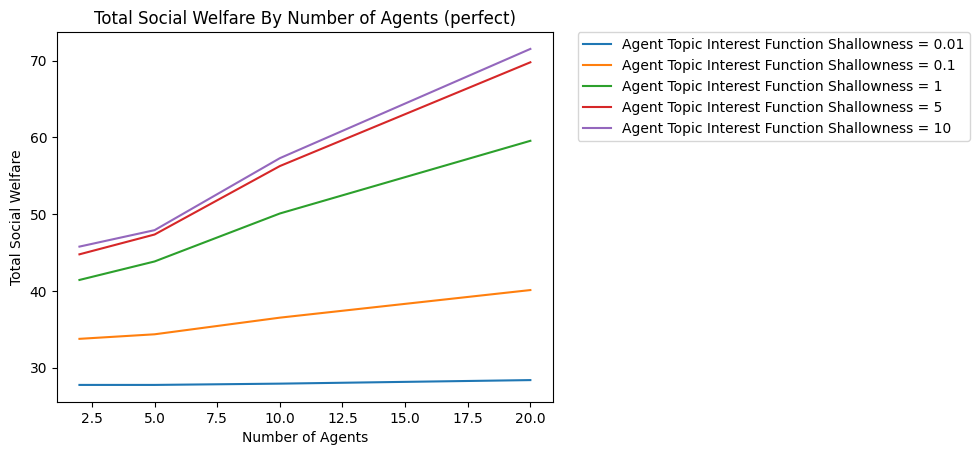

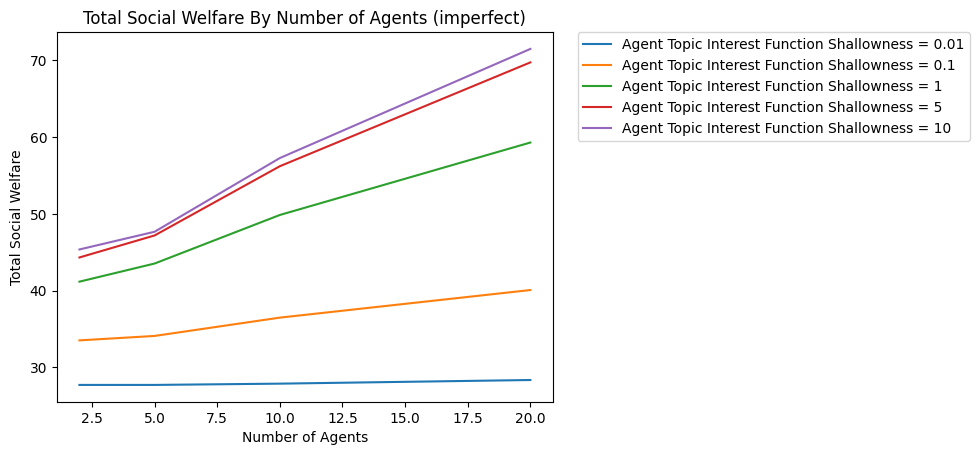

In [10]:
plt.figure()
for second_param_value in second_param_values:
    perfect_info_stats: list[TestStats] = second_param_stats[second_param_value]['perfect']
    #imperfect_info_stats = stats[first_param_value]['imperfect']
    plt.title(f'Total Social Welfare By {first_param_x_label} (perfect)')
    plt.xlabel(first_param_x_label)
    plt.ylabel('Total Social Welfare')
    perfect_social_welfares = [test.total_social_welfare[-1] for test in perfect_info_stats]
    plt.plot(first_param_values, perfect_social_welfares, label=f'{second_param_legend_label} = {second_param_value}')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

if test_imperfect:
    plt.figure()
    for second_param_value in second_param_values:
        #perfect_info_stats: list[TestStats] = second_param_stats[first_param_value]['perfect']
        imperfect_info_stats = second_param_stats[second_param_value]['imperfect']
        plt.title(f'Total Social Welfare By {first_param_x_label} (imperfect)')
        plt.xlabel(first_param_x_label)
        plt.ylabel('Total Social Welfare')
        imperfect_social_welfares = [test.total_social_welfare[-1] for test in imperfect_info_stats]
        plt.plot(first_param_values, imperfect_social_welfares, label=f'{second_param_legend_label} = {second_param_value}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

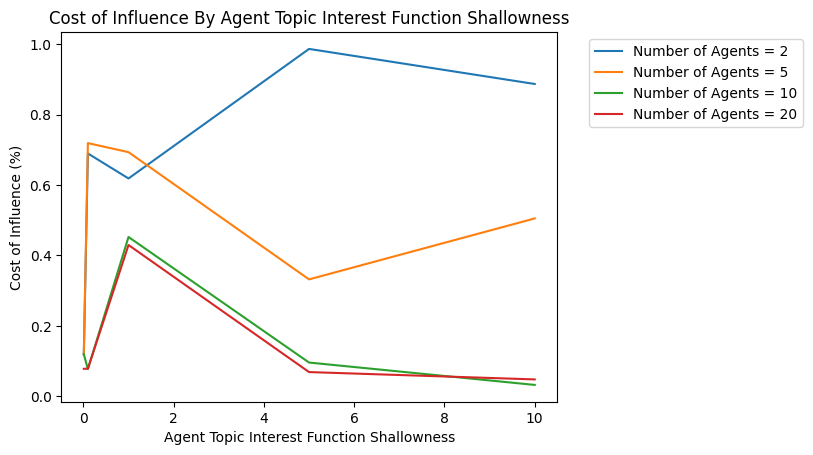

In [11]:
if test_imperfect:
    plt.figure()
    for first_param_value in first_param_values:
        perfect_info_stats: list[TestStats] = first_param_stats[first_param_value]['perfect']
        imperfect_info_stats = first_param_stats[first_param_value]['imperfect']
        plt.title(f'Cost of Influence By {second_param_x_label}')
        plt.xlabel(second_param_x_label)
        plt.ylabel('Cost of Influence (%)')
        perfect_social_welfares = [test.total_social_welfare[-1] for test in perfect_info_stats]
        imperfect_social_welfares = [test.total_social_welfare[-1] for test in imperfect_info_stats]

        costs_of_influence = [(perfect_social_welfare - imperfect_social_welfare) / perfect_social_welfare * 100 for imperfect_social_welfare, perfect_social_welfare in zip(imperfect_social_welfares, perfect_social_welfares)]
        plt.plot(second_param_values, costs_of_influence, label=f'{first_param_legend_label} = {first_param_value}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    

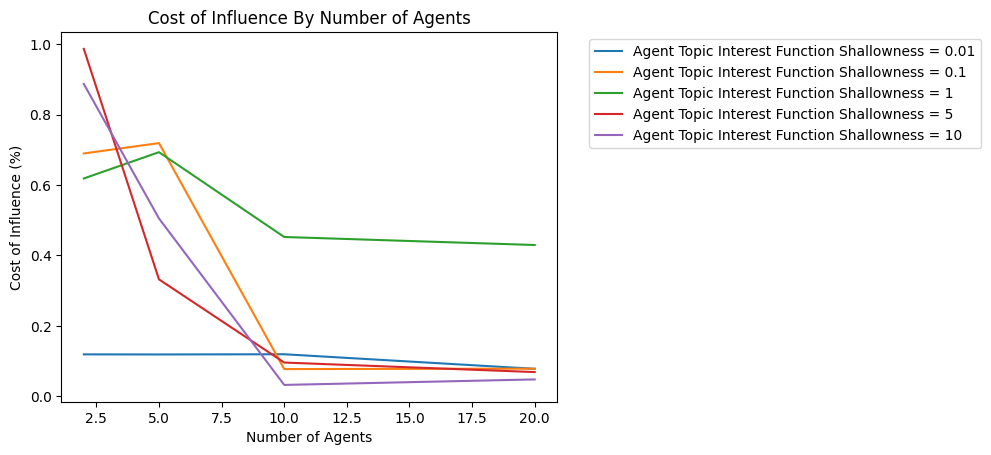

In [12]:
if test_imperfect:
    plt.figure()
    for second_param_value in second_param_values:
        perfect_info_stats: list[TestStats] = second_param_stats[second_param_value]['perfect']
        imperfect_info_stats = second_param_stats[second_param_value]['imperfect']
        plt.title(f'Cost of Influence By {first_param_x_label}')
        plt.xlabel(first_param_x_label)
        plt.ylabel('Cost of Influence (%)')
        perfect_social_welfares = [test.total_social_welfare[-1] for test in perfect_info_stats]
        imperfect_social_welfares = [test.total_social_welfare[-1] for test in imperfect_info_stats]

        costs_of_influence = [(perfect_social_welfare - imperfect_social_welfare) / perfect_social_welfare * 100 for imperfect_social_welfare, perfect_social_welfare in zip(imperfect_social_welfares, perfect_social_welfares)]
        plt.plot(first_param_values, costs_of_influence, label=f'{second_param_legend_label} = {second_param_value}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    

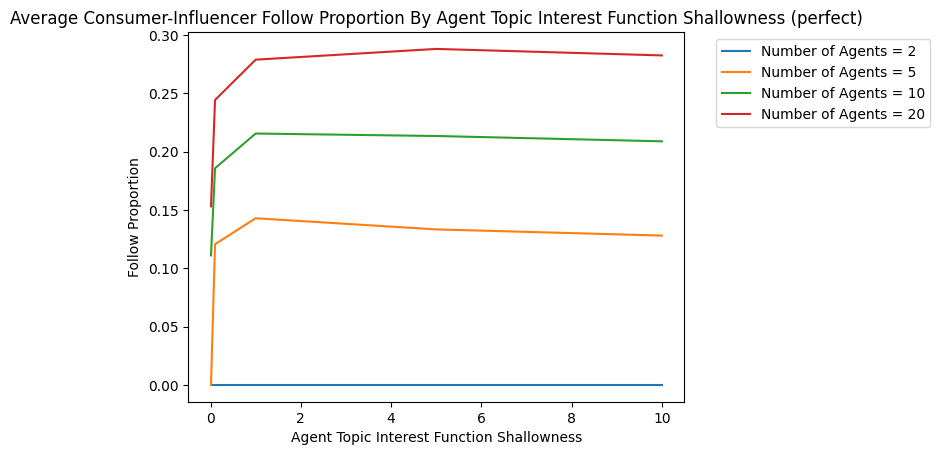

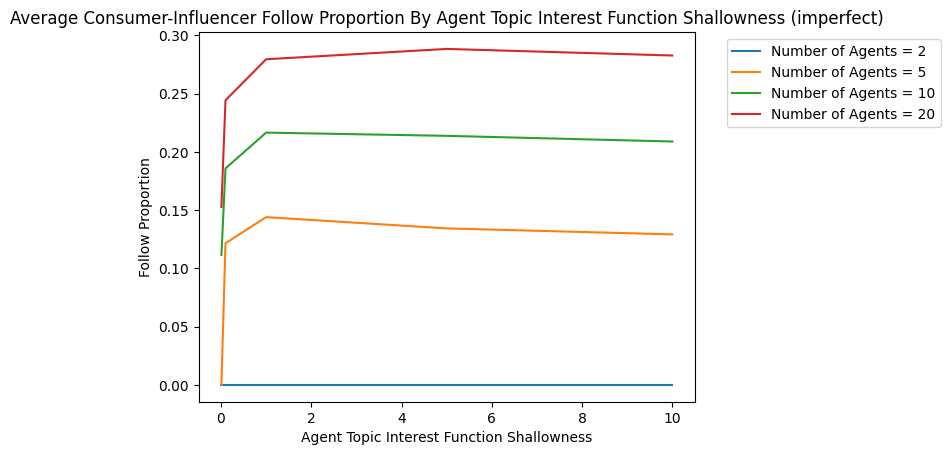

In [13]:
plt.figure()
for first_param_value in first_param_values:
    perfect_info_stats: list[TestStats] = first_param_stats[first_param_value]['perfect']
    #imperfect_info_stats = stats[first_param_value]['imperfect']
    plt.title(f'Average Consumer-Influencer Follow Proportion By {second_param_x_label} (perfect)')
    plt.xlabel(second_param_x_label)
    plt.ylabel('Follow Proportion')
    follow_proportions = [test.average_influencer_follow_proportion[-1] for test in perfect_info_stats]
    plt.plot(second_param_values, follow_proportions, label=f'{first_param_legend_label} = {first_param_value}')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

if test_imperfect:
    plt.figure()
    for first_param_value in first_param_values:
        #perfect_info_stats: list[TestStats] = first_param_stats[first_param_value]['perfect']
        imperfect_info_stats = first_param_stats[first_param_value]['imperfect']
        plt.title(f'Average Consumer-Influencer Follow Proportion By {second_param_x_label} (imperfect)')
        plt.xlabel(second_param_x_label)
        plt.ylabel('Follow Proportion')
        follow_proportions = [test.average_influencer_follow_proportion[-1] for test in imperfect_info_stats]
        plt.plot(second_param_values, follow_proportions, label=f'{first_param_legend_label} = {first_param_value}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    

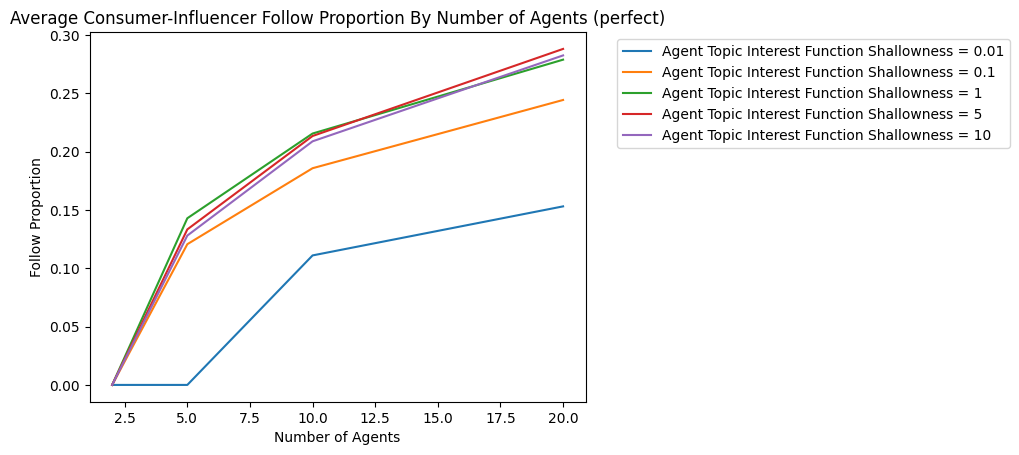

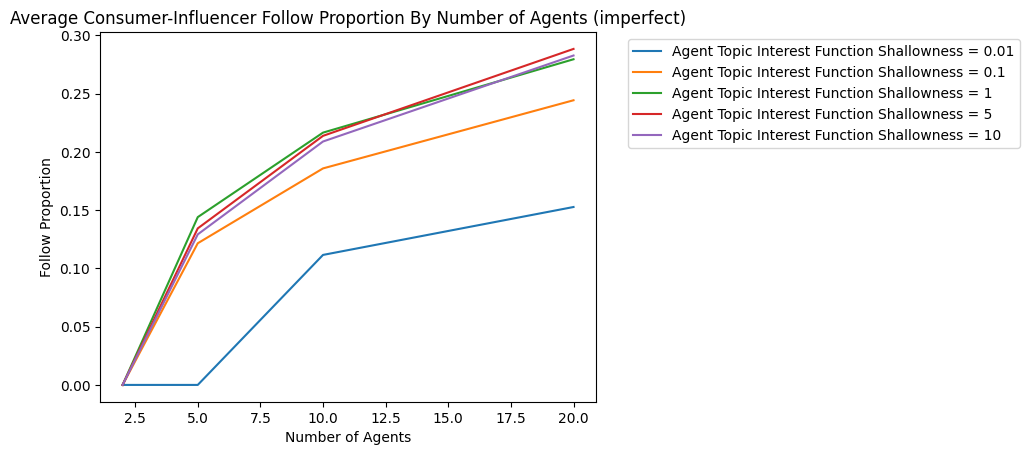

In [14]:
plt.figure()
for second_param_value in second_param_values:
    perfect_info_stats: list[TestStats] = second_param_stats[second_param_value]['perfect']
    #imperfect_info_stats = stats[first_param_value]['imperfect']
    plt.title(f'Average Consumer-Influencer Follow Proportion By {first_param_x_label} (perfect)')
    plt.xlabel(first_param_x_label)
    plt.ylabel('Follow Proportion')
    follow_proportions = [test.average_influencer_follow_proportion[-1] for test in perfect_info_stats]
    plt.plot(first_param_values, follow_proportions, label=f'{second_param_legend_label} = {second_param_value}')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

if test_imperfect:
    plt.figure()
    for second_param_value in second_param_values:
        #perfect_info_stats: list[TestStats] = second_param_stats[second_param_value]['perfect']
        imperfect_info_stats = second_param_stats[second_param_value]['imperfect']
        plt.title(f'Average Consumer-Influencer Follow Proportion By {first_param_x_label} (imperfect)')
        plt.xlabel(first_param_x_label)
        plt.ylabel('Follow Proportion')
        follow_proportions = [test.average_influencer_follow_proportion[-1] for test in imperfect_info_stats]
        plt.plot(first_param_values, follow_proportions, label=f'{second_param_legend_label} = {second_param_value}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    

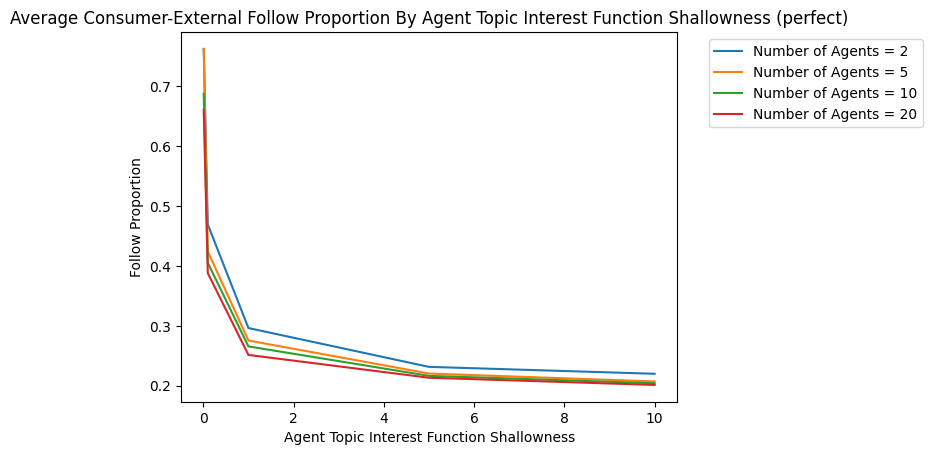

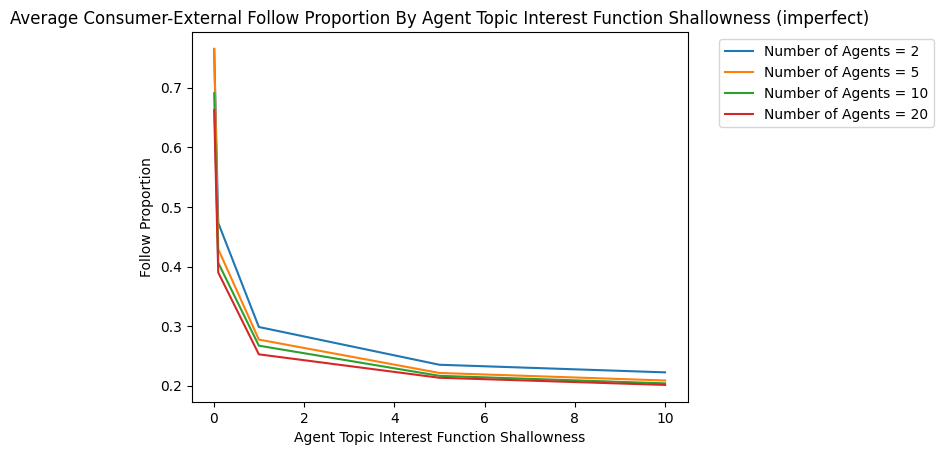

In [15]:
plt.figure()
for first_param_value in first_param_values:
    perfect_info_stats: list[TestStats] = first_param_stats[first_param_value]['perfect']
    #imperfect_info_stats = stats[first_param_value]['imperfect']
    plt.title(f'Average Consumer-External Follow Proportion By {second_param_x_label} (perfect)')
    plt.xlabel(second_param_x_label)
    plt.ylabel('Follow Proportion')
    follow_proportions = [test.average_external_follow_proportion[-1] for test in perfect_info_stats]
    plt.plot(second_param_values, follow_proportions, label=f'{first_param_legend_label} = {first_param_value}')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

if test_imperfect:
    plt.figure()
    for first_param_value in first_param_values:
        #perfect_info_stats: list[TestStats] = first_param_stats[first_param_value]['perfect']
        imperfect_info_stats = first_param_stats[first_param_value]['imperfect']
        plt.title(f'Average Consumer-External Follow Proportion By {second_param_x_label} (imperfect)')
        plt.xlabel(second_param_x_label)
        plt.ylabel('Follow Proportion')
        follow_proportions = [test.average_external_follow_proportion[-1] for test in imperfect_info_stats]
        plt.plot(second_param_values, follow_proportions, label=f'{first_param_legend_label} = {first_param_value}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

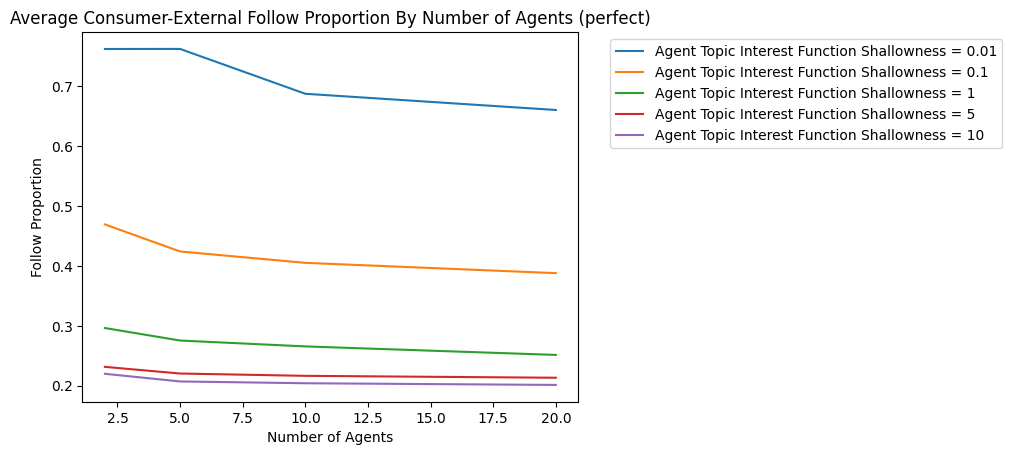

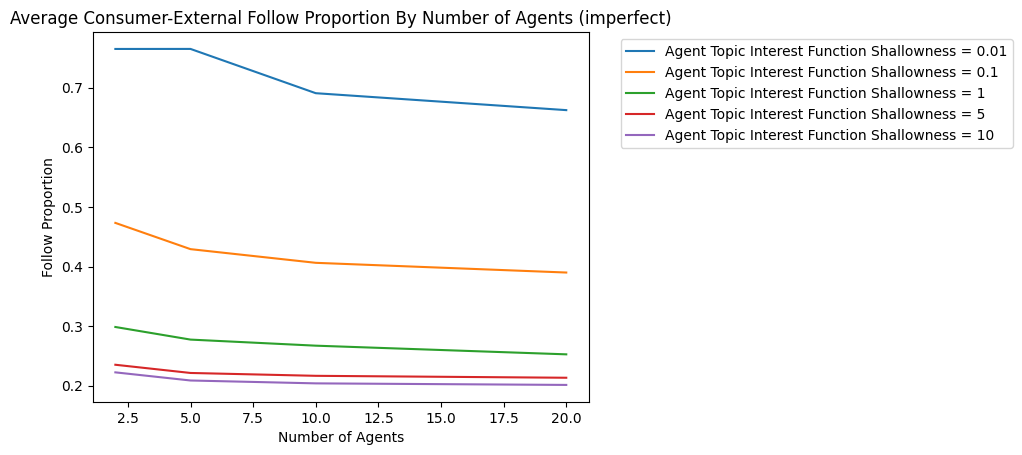

In [16]:
plt.figure()
for second_param_value in second_param_values:
    perfect_info_stats: list[TestStats] = second_param_stats[second_param_value]['perfect']
    #imperfect_info_stats = stats[first_param_value]['imperfect']
    plt.title(f'Average Consumer-External Follow Proportion By {first_param_x_label} (perfect)')
    plt.xlabel(first_param_x_label)
    plt.ylabel('Follow Proportion')
    follow_proportions = [test.average_external_follow_proportion[-1] for test in perfect_info_stats]
    plt.plot(first_param_values, follow_proportions, label=f'{second_param_legend_label} = {second_param_value}')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

if test_imperfect:
    plt.figure()
    for second_param_value in second_param_values:
        #perfect_info_stats: list[TestStats] = second_param_stats[first_param_value]['perfect']
        imperfect_info_stats = second_param_stats[second_param_value]['imperfect']
        plt.title(f'Average Consumer-External Follow Proportion By {first_param_x_label} (imperfect)')
        plt.xlabel(first_param_x_label)
        plt.ylabel('Follow Proportion')
        follow_proportions = [test.average_external_follow_proportion[-1] for test in imperfect_info_stats]
        plt.plot(first_param_values, follow_proportions, label=f'{second_param_legend_label} = {second_param_value}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

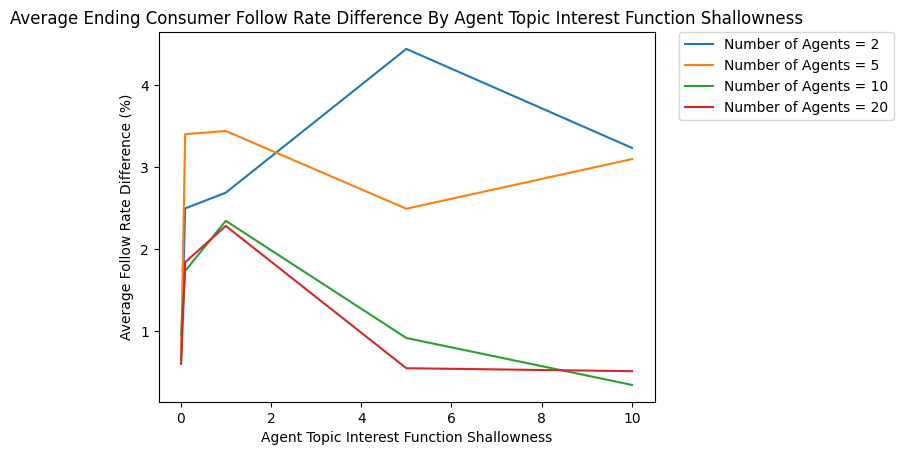

In [17]:
if test_imperfect:
    plt.figure()
    plt.title(f"Average Ending Consumer Follow Rate Difference By {second_param_x_label}")
    plt.xlabel(second_param_x_label)
    plt.ylabel("Average Follow Rate Difference (%)")
    for first_param_value in first_param_values:
        perfect_info_stats: list[TestStats] = first_param_stats[first_param_value]['perfect']
        imperfect_info_stats = first_param_stats[first_param_value]['imperfect']

        avg_follow_rate_diffs = []

        for i in range(len(perfect_info_stats)):
            perfect_stat: TestStats = perfect_info_stats[i]
            imperfect_stat: TestStats = imperfect_info_stats[i]

            avg_follow_rate_diff = 0

            for index in perfect_stat.consumer_stats:
                perfect_consumer_stat = perfect_stat.consumer_stats[index]
                imperfect_consumer_stat = imperfect_stat.consumer_stats[index]

                ending_follow_rate_diff = np.linalg.norm(perfect_consumer_stat.following_rates[-1] - imperfect_consumer_stat.following_rates[-1]) / np.linalg.norm(perfect_consumer_stat.following_rates[-1]) * 100
                avg_follow_rate_diff += ending_follow_rate_diff
            
            avg_follow_rate_diff /= len(perfect_stat.consumer_stats)
            avg_follow_rate_diffs.append(avg_follow_rate_diff)
        
        plt.plot(second_param_values, avg_follow_rate_diffs, label=f'{first_param_legend_label} = {first_param_value}')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

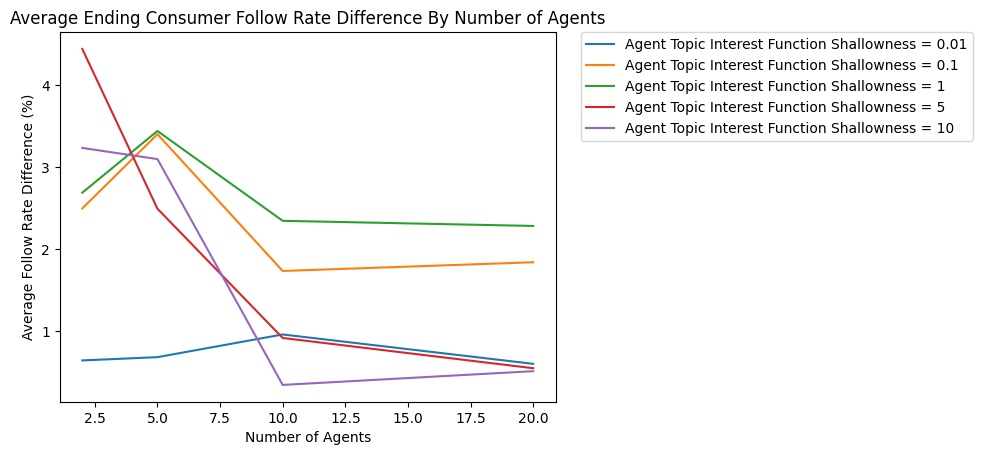

In [18]:
if test_imperfect:
    plt.figure()
    plt.title(f"Average Ending Consumer Follow Rate Difference By {first_param_x_label}")
    plt.xlabel(first_param_x_label)
    plt.ylabel("Average Follow Rate Difference (%)")
    for second_param_value in second_param_values:
        perfect_info_stats: list[TestStats] = second_param_stats[second_param_value]['perfect']
        imperfect_info_stats = second_param_stats[second_param_value]['imperfect']

        avg_follow_rate_diffs = []

        for i in range(len(perfect_info_stats)):
            perfect_stat: TestStats = perfect_info_stats[i]
            imperfect_stat: TestStats = imperfect_info_stats[i]

            avg_follow_rate_diff = 0

            for index in perfect_stat.consumer_stats:
                perfect_consumer_stat = perfect_stat.consumer_stats[index]
                imperfect_consumer_stat = imperfect_stat.consumer_stats[index]

                ending_follow_rate_diff = np.linalg.norm(perfect_consumer_stat.following_rates[-1] - imperfect_consumer_stat.following_rates[-1]) / np.linalg.norm(perfect_consumer_stat.following_rates[-1]) * 100
                avg_follow_rate_diff += ending_follow_rate_diff
            
            avg_follow_rate_diff /= len(perfect_stat.consumer_stats)
            avg_follow_rate_diffs.append(avg_follow_rate_diff)
        
        plt.plot(first_param_values, avg_follow_rate_diffs, label=f'{second_param_legend_label} = {second_param_value}')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

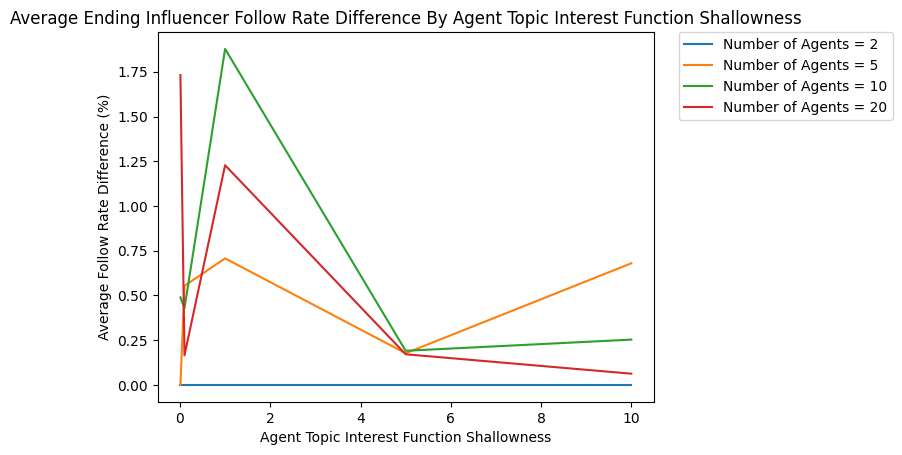

In [19]:
if test_imperfect:
    plt.figure()
    plt.title(f"Average Ending Influencer Follow Rate Difference By {second_param_x_label}")
    plt.xlabel(second_param_x_label)
    plt.ylabel("Average Follow Rate Difference (%)")
    for first_param_value in first_param_values:
        perfect_info_stats: list[TestStats] = first_param_stats[first_param_value]['perfect']
        imperfect_info_stats = first_param_stats[first_param_value]['imperfect']

        avg_follow_rate_diffs = []

        for i in range(len(perfect_info_stats)):
            perfect_stat: TestStats = perfect_info_stats[i]
            imperfect_stat: TestStats = imperfect_info_stats[i]

            avg_follow_rate_diff = 0

            for index in perfect_stat.influencer_stats:
                perfect_influencer_stat = perfect_stat.influencer_stats[index]
                imperfect_influencer_stat = imperfect_stat.influencer_stats[index]

                ending_follow_rate_diff = np.linalg.norm(perfect_influencer_stat.following_rates[-1] - imperfect_influencer_stat.following_rates[-1]) / np.linalg.norm(perfect_influencer_stat.following_rates[-1]) * 100
                avg_follow_rate_diff += ending_follow_rate_diff
            
            avg_follow_rate_diff /= len(perfect_stat.influencer_stats)
            avg_follow_rate_diffs.append(avg_follow_rate_diff)
        
        plt.plot(second_param_values, avg_follow_rate_diffs, label=f'{first_param_legend_label} = {first_param_value}')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

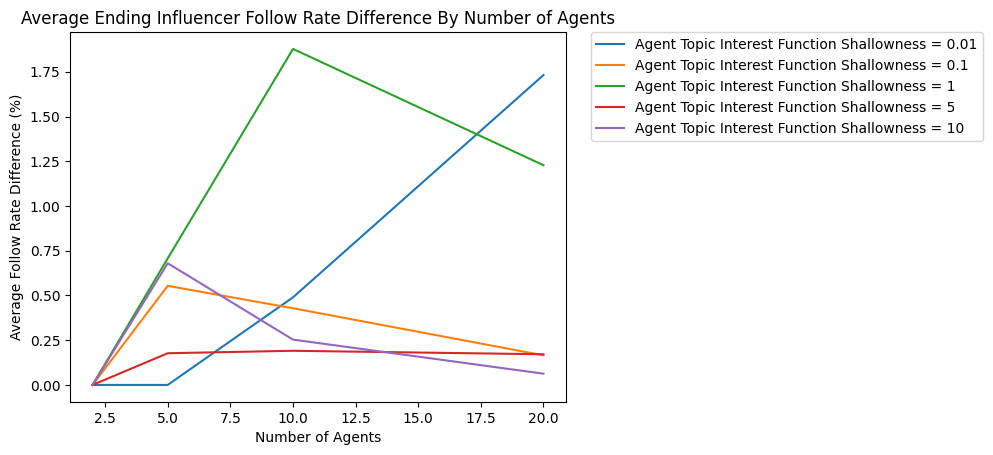

In [20]:
if test_imperfect:
    plt.figure()
    plt.title(f"Average Ending Influencer Follow Rate Difference By {first_param_x_label}")
    plt.xlabel(first_param_x_label)
    plt.ylabel("Average Follow Rate Difference (%)")
    for second_param_value in second_param_values:
        perfect_info_stats: list[TestStats] = second_param_stats[second_param_value]['perfect']
        imperfect_info_stats = second_param_stats[second_param_value]['imperfect']

        avg_follow_rate_diffs = []

        for i in range(len(perfect_info_stats)):
            perfect_stat: TestStats = perfect_info_stats[i]
            imperfect_stat: TestStats = imperfect_info_stats[i]

            avg_follow_rate_diff = 0

            for index in perfect_stat.influencer_stats:
                perfect_influencer_stat = perfect_stat.influencer_stats[index]
                imperfect_influencer_stat = imperfect_stat.influencer_stats[index]

                ending_follow_rate_diff = np.linalg.norm(perfect_influencer_stat.following_rates[-1] - imperfect_influencer_stat.following_rates[-1]) / np.linalg.norm(perfect_influencer_stat.following_rates[-1]) * 100
                avg_follow_rate_diff += ending_follow_rate_diff
            
            avg_follow_rate_diff /= len(perfect_stat.influencer_stats)
            avg_follow_rate_diffs.append(avg_follow_rate_diff)
        
        plt.plot(first_param_values, avg_follow_rate_diffs, label=f'{second_param_legend_label} = {second_param_value}')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

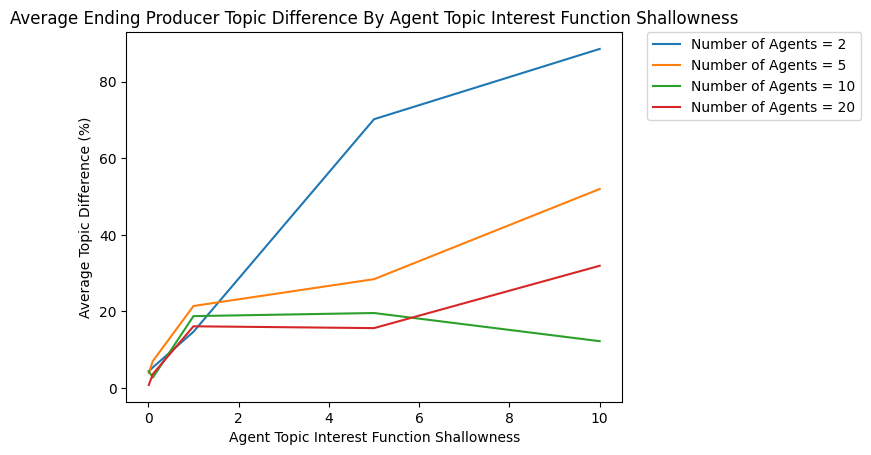

In [21]:
if test_imperfect:
    plt.figure()
    plt.title(f"Average Ending Producer Topic Difference By {second_param_x_label}")
    plt.xlabel(second_param_x_label)
    plt.ylabel("Average Topic Difference (%)")
    for first_param_value in first_param_values:
        perfect_info_stats: list[TestStats] = first_param_stats[first_param_value]['perfect']
        imperfect_info_stats = first_param_stats[first_param_value]['imperfect']

        avg_topic_diffs = []

        for i in range(len(perfect_info_stats)):
            perfect_stat: TestStats = perfect_info_stats[i]
            imperfect_stat: TestStats = imperfect_info_stats[i]

            avg_topic_diff = 0

            for index in perfect_stat.producer_stats:
                perfect_producer_stat = perfect_stat.producer_stats[index]
                imperfect_producer_stat = imperfect_stat.producer_stats[index]

                if perfect_producer_stat.topics[-1] == 0:
                    continue

                ending_topic_diff = np.linalg.norm(perfect_producer_stat.topics[-1] - imperfect_producer_stat.topics[-1]) / (np.linalg.norm(perfect_producer_stat.topics[-1])) * 100
                avg_topic_diff += ending_topic_diff
            
            avg_topic_diff /= len(perfect_stat.producer_stats)
            avg_topic_diffs.append(avg_topic_diff)
        
        plt.plot(second_param_values, avg_topic_diffs, label=f'{first_param_legend_label} = {first_param_value}')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

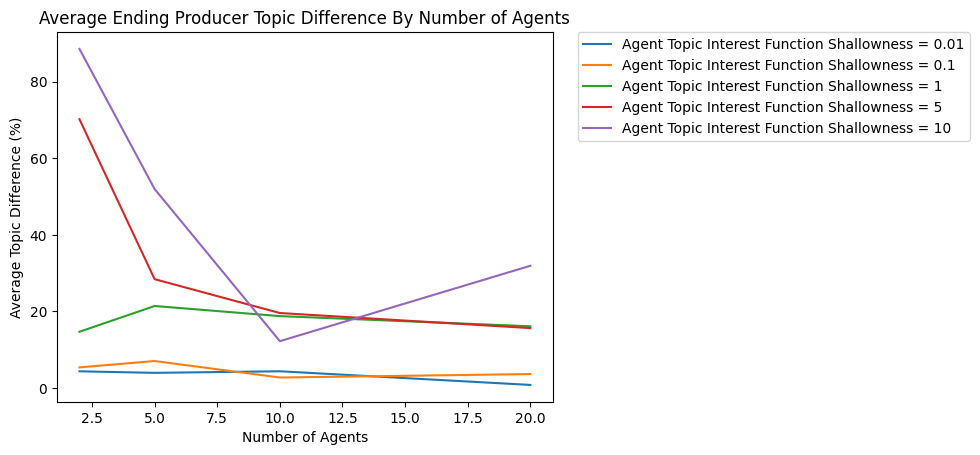

In [22]:
if test_imperfect:
    plt.figure()
    plt.title(f"Average Ending Producer Topic Difference By {first_param_x_label}")
    plt.xlabel(first_param_x_label)
    plt.ylabel("Average Topic Difference (%)")
    for second_param_value in second_param_values:
        perfect_info_stats: list[TestStats] = second_param_stats[second_param_value]['perfect']
        imperfect_info_stats = second_param_stats[second_param_value]['imperfect']

        avg_topic_diffs = []

        for i in range(len(perfect_info_stats)):
            perfect_stat: TestStats = perfect_info_stats[i]
            imperfect_stat: TestStats = imperfect_info_stats[i]

            avg_topic_diff = 0

            for index in perfect_stat.producer_stats:
                perfect_producer_stat = perfect_stat.producer_stats[index]
                imperfect_producer_stat = imperfect_stat.producer_stats[index]

                if perfect_producer_stat.topics[-1] == 0:
                    continue

                ending_topic_diff = np.linalg.norm(perfect_producer_stat.topics[-1] - imperfect_producer_stat.topics[-1]) / (np.linalg.norm(perfect_producer_stat.topics[-1])) * 100
                avg_topic_diff += ending_topic_diff
            
            avg_topic_diff /= len(perfect_stat.producer_stats)
            avg_topic_diffs.append(avg_topic_diff)
        
        plt.plot(first_param_values, avg_topic_diffs, label=f'{second_param_legend_label} = {second_param_value}')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

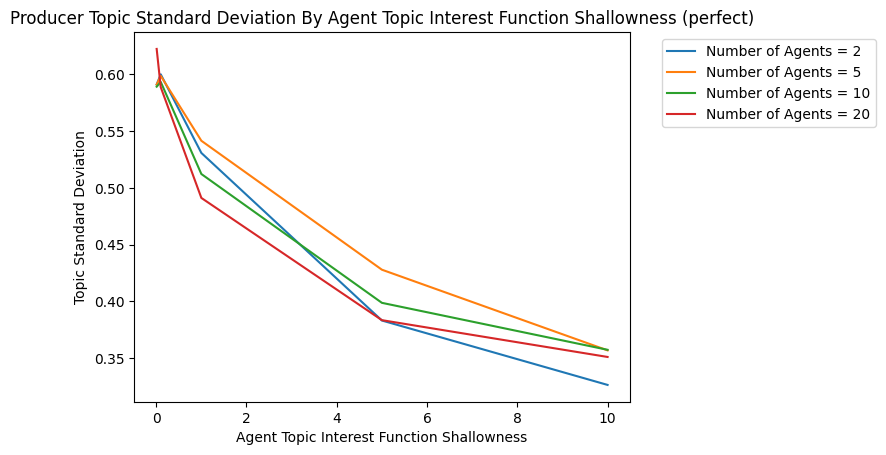

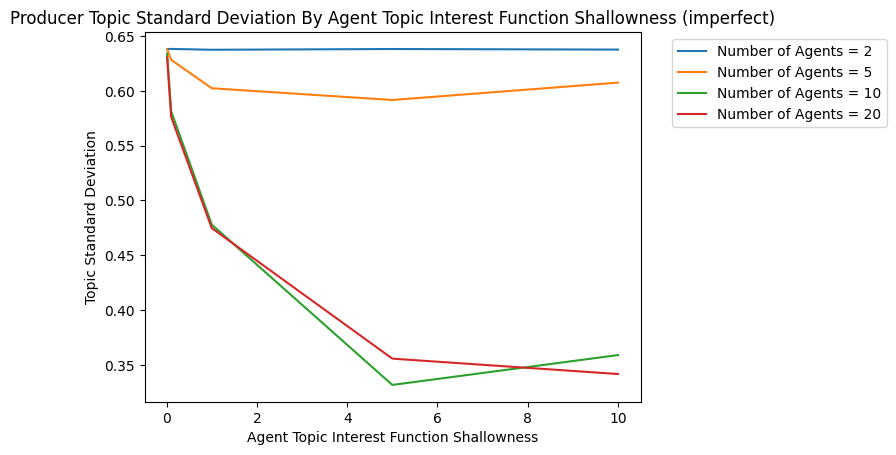

In [23]:
plt.figure()
for first_param_value in first_param_values:
    perfect_info_stats: list[TestStats] = first_param_stats[first_param_value]['perfect']
    #imperfect_info_stats = stats[first_param_value]['imperfect']
    plt.title(f'Producer Topic Standard Deviation By {second_param_x_label} (perfect)')
    plt.xlabel(second_param_x_label)
    plt.ylabel('Topic Standard Deviation')
    std_deviations = [test.producer_topic_standard_deviation[-1] for test in perfect_info_stats]
    plt.plot(second_param_values, std_deviations, label=f'{first_param_legend_label} = {first_param_value}')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

if test_imperfect:
    plt.figure()
    for first_param_value in first_param_values:
        #perfect_info_stats: list[TestStats] = first_param_stats[first_param_value]['perfect']
        imperfect_info_stats = first_param_stats[first_param_value]['imperfect']
        plt.title(f'Producer Topic Standard Deviation By {second_param_x_label} (imperfect)')
        plt.xlabel(second_param_x_label)
        plt.ylabel('Topic Standard Deviation')
        std_deviations = [test.producer_topic_standard_deviation[-1] for test in imperfect_info_stats]
        plt.plot(second_param_values, std_deviations, label=f'{first_param_legend_label} = {first_param_value}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

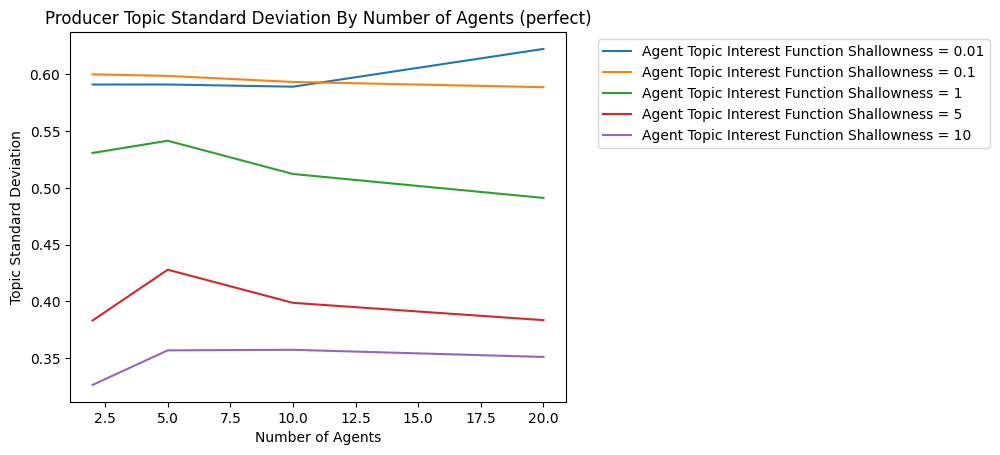

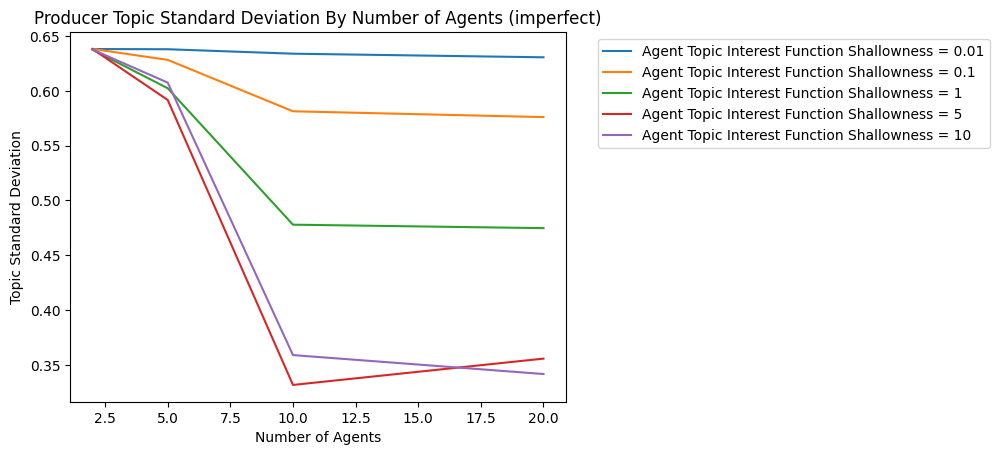

In [24]:
plt.figure()
for second_param_value in second_param_values:
    perfect_info_stats: list[TestStats] = second_param_stats[second_param_value]['perfect']
    #imperfect_info_stats = stats[first_param_value]['imperfect']
    plt.title(f'Producer Topic Standard Deviation By {first_param_x_label} (perfect)')
    plt.xlabel(first_param_x_label)
    plt.ylabel('Topic Standard Deviation')
    std_deviations = [test.producer_topic_standard_deviation[-1] for test in perfect_info_stats]
    plt.plot(first_param_values, std_deviations, label=f'{second_param_legend_label} = {second_param_value}')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

if test_imperfect:
    plt.figure()
    for second_param_value in second_param_values:
        #perfect_info_stats: list[TestStats] = first_param_stats[first_param_value]['perfect']
        imperfect_info_stats = second_param_stats[second_param_value]['imperfect']
        plt.title(f'Producer Topic Standard Deviation By {first_param_x_label} (imperfect)')
        plt.xlabel(first_param_x_label)
        plt.ylabel('Topic Standard Deviation')
        std_deviations = [test.producer_topic_standard_deviation[-1] for test in imperfect_info_stats]
        plt.plot(first_param_values, std_deviations, label=f'{second_param_legend_label} = {second_param_value}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

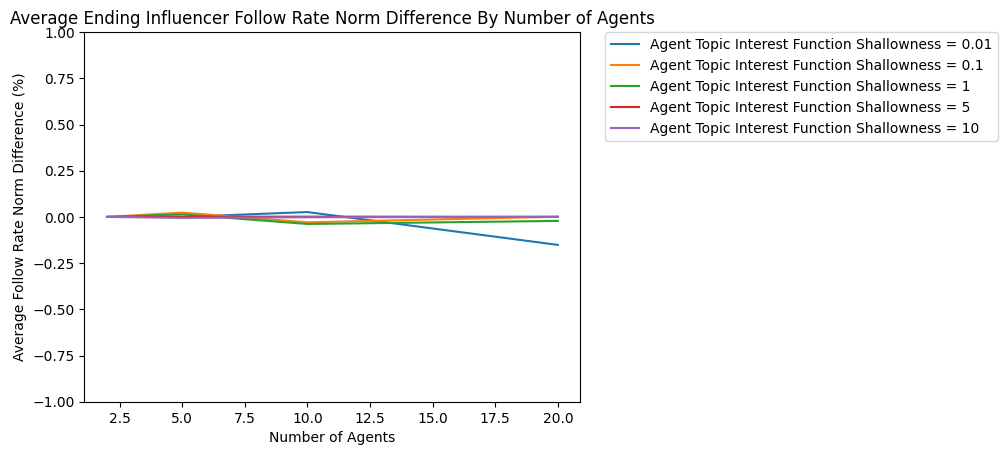

In [25]:
if test_imperfect:
    plt.figure()
    plt.title(f"Average Ending Influencer Follow Rate Norm Difference By {first_param_x_label}")
    plt.xlabel(first_param_x_label)
    plt.ylabel("Average Follow Rate Norm Difference (%)")
    for second_param_value in second_param_values:
        perfect_info_stats: list[TestStats] = second_param_stats[second_param_value]['perfect']
        imperfect_info_stats = second_param_stats[second_param_value]['imperfect']

        avg_follow_rate_norm_diffs = []

        for i in range(len(perfect_info_stats)):
            perfect_stat: TestStats = perfect_info_stats[i]
            imperfect_stat: TestStats = imperfect_info_stats[i]

            avg_follow_rate_norm_diff = 0

            for index in perfect_stat.influencer_stats:
                perfect_influencer_stat = perfect_stat.influencer_stats[index]
                imperfect_influencer_stat = imperfect_stat.influencer_stats[index]

                ending_follow_rate_norm_diff = (np.linalg.norm(perfect_influencer_stat.following_rates[-1]) - np.linalg.norm(imperfect_influencer_stat.following_rates[-1])) / np.linalg.norm(perfect_influencer_stat.following_rates[-1]) * 100
                avg_follow_rate_norm_diff += ending_follow_rate_norm_diff
            
            avg_follow_rate_norm_diff /= len(perfect_stat.influencer_stats)
            avg_follow_rate_norm_diffs.append(avg_follow_rate_norm_diff)
        
        plt.plot(first_param_values, avg_follow_rate_norm_diffs, label=f'{second_param_legend_label} = {second_param_value}')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.ylim(-1, 1)
    plt.show()

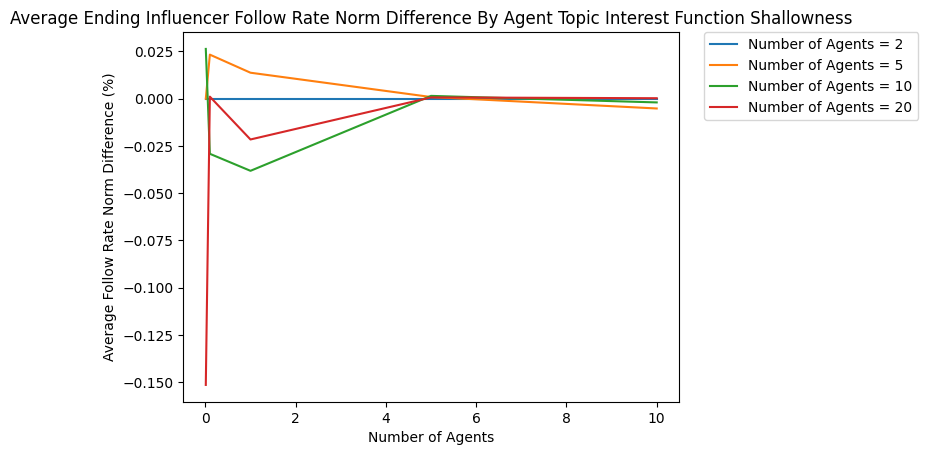

In [26]:
if test_imperfect:
    plt.figure()
    plt.title(f"Average Ending Influencer Follow Rate Norm Difference By {second_param_x_label}")
    plt.xlabel(first_param_x_label)
    plt.ylabel("Average Follow Rate Norm Difference (%)")
    for first_param_value in first_param_values:
        perfect_info_stats: list[TestStats] = first_param_stats[first_param_value]['perfect']
        imperfect_info_stats = first_param_stats[first_param_value]['imperfect']

        avg_follow_rate_norm_diffs = []

        for i in range(len(perfect_info_stats)):
            perfect_stat: TestStats = perfect_info_stats[i]
            imperfect_stat: TestStats = imperfect_info_stats[i]

            avg_follow_rate_norm_diff = 0

            for index in perfect_stat.influencer_stats:
                perfect_influencer_stat = perfect_stat.influencer_stats[index]
                imperfect_influencer_stat = imperfect_stat.influencer_stats[index]

                ending_follow_rate_norm_diff = (np.linalg.norm(perfect_influencer_stat.following_rates[-1]) - np.linalg.norm(imperfect_influencer_stat.following_rates[-1])) / np.linalg.norm(perfect_influencer_stat.following_rates[-1]) * 100
                avg_follow_rate_norm_diff += ending_follow_rate_norm_diff
            
            avg_follow_rate_norm_diff /= len(perfect_stat.influencer_stats)
            avg_follow_rate_norm_diffs.append(avg_follow_rate_norm_diff)
        
        plt.plot(second_param_values, avg_follow_rate_norm_diffs, label=f'{first_param_legend_label} = {first_param_value}')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

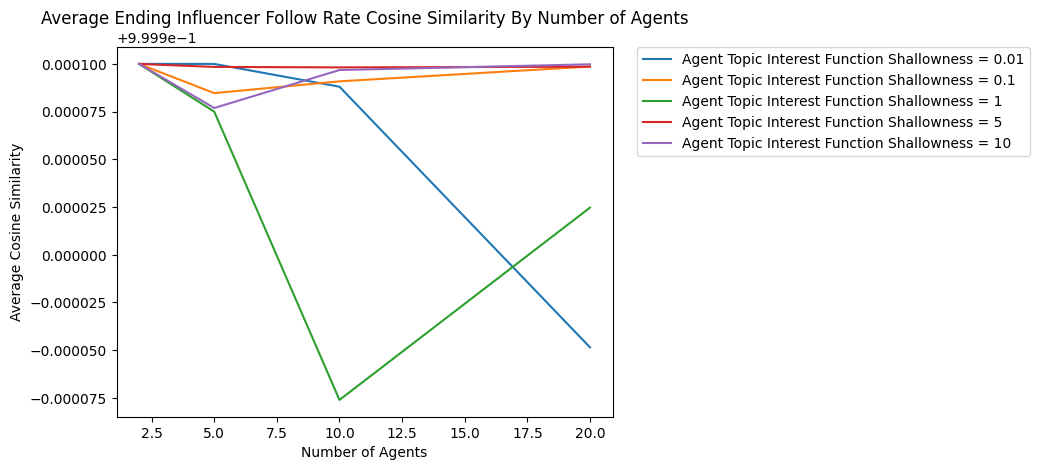

In [27]:
if test_imperfect:
    plt.figure()
    plt.title(f"Average Ending Influencer Follow Rate Cosine Similarity By {first_param_x_label}")
    plt.xlabel(first_param_x_label)
    plt.ylabel("Average Cosine Similarity")
    for second_param_value in second_param_values:
        perfect_info_stats: list[TestStats] = second_param_stats[second_param_value]['perfect']
        imperfect_info_stats = second_param_stats[second_param_value]['imperfect']

        avg_follow_rate_sims = []

        for i in range(len(perfect_info_stats)):
            perfect_stat: TestStats = perfect_info_stats[i]
            imperfect_stat: TestStats = imperfect_info_stats[i]

            avg_follow_rate_sim = 0

            for index in perfect_stat.influencer_stats:
                perfect_influencer_stat = perfect_stat.influencer_stats[index]
                imperfect_influencer_stat = imperfect_stat.influencer_stats[index]

                ending_follow_rate_sim = np.dot(perfect_influencer_stat.following_rates[-1], imperfect_influencer_stat.following_rates[-1]) / (np.linalg.norm(perfect_influencer_stat.following_rates[-1]) * np.linalg.norm(imperfect_influencer_stat.following_rates[-1]))
                avg_follow_rate_sim += ending_follow_rate_sim
            
            avg_follow_rate_sim /= len(perfect_stat.influencer_stats)
            avg_follow_rate_sims.append(avg_follow_rate_sim)
        
        plt.plot(first_param_values, avg_follow_rate_sims, label=f'{second_param_legend_label} = {second_param_value}')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

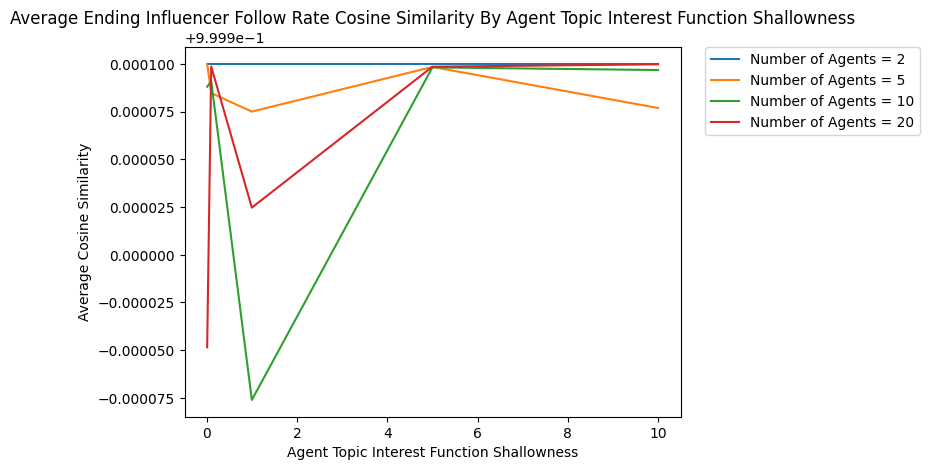

In [28]:
if test_imperfect:
    plt.figure()
    plt.title(f"Average Ending Influencer Follow Rate Cosine Similarity By {second_param_x_label}")
    plt.xlabel(second_param_x_label)
    plt.ylabel("Average Cosine Similarity")
    for first_param_value in first_param_values:
        perfect_info_stats: list[TestStats] = first_param_stats[first_param_value]['perfect']
        imperfect_info_stats = first_param_stats[first_param_value]['imperfect']

        avg_follow_rate_sims = []

        for i in range(len(perfect_info_stats)):
            perfect_stat: TestStats = perfect_info_stats[i]
            imperfect_stat: TestStats = imperfect_info_stats[i]

            avg_follow_rate_sim = 0

            for index in perfect_stat.influencer_stats:
                perfect_influencer_stat = perfect_stat.influencer_stats[index]
                imperfect_influencer_stat = imperfect_stat.influencer_stats[index]

                ending_follow_rate_sim = np.dot(perfect_influencer_stat.following_rates[-1], imperfect_influencer_stat.following_rates[-1]) / (np.linalg.norm(perfect_influencer_stat.following_rates[-1]) * np.linalg.norm(imperfect_influencer_stat.following_rates[-1]))
                avg_follow_rate_sim += ending_follow_rate_sim
            
            avg_follow_rate_sim /= len(perfect_stat.influencer_stats)
            avg_follow_rate_sims.append(avg_follow_rate_sim)
        
        plt.plot(second_param_values, avg_follow_rate_sims, label=f'{first_param_legend_label} = {first_param_value}')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

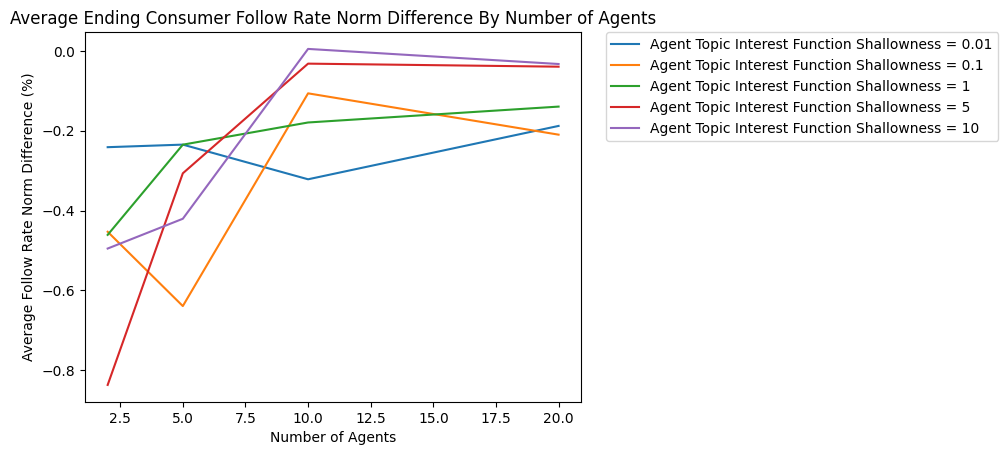

In [29]:
if test_imperfect:
    plt.figure()
    plt.title(f"Average Ending Consumer Follow Rate Norm Difference By {first_param_x_label}")
    plt.xlabel(first_param_x_label)
    plt.ylabel("Average Follow Rate Norm Difference (%)")
    for second_param_value in second_param_values:
        perfect_info_stats: list[TestStats] = second_param_stats[second_param_value]['perfect']
        imperfect_info_stats = second_param_stats[second_param_value]['imperfect']

        avg_follow_rate_norm_diffs = []

        for i in range(len(perfect_info_stats)):
            perfect_stat: TestStats = perfect_info_stats[i]
            imperfect_stat: TestStats = imperfect_info_stats[i]

            avg_follow_rate_norm_diff = 0

            for index in perfect_stat.consumer_stats:
                perfect_consumer_stat = perfect_stat.consumer_stats[index]
                imperfect_consumer_stat = imperfect_stat.consumer_stats[index]

                ending_follow_rate_norm_diff = (np.linalg.norm(perfect_consumer_stat.following_rates[-1]) - np.linalg.norm(imperfect_consumer_stat.following_rates[-1])) / np.linalg.norm(perfect_consumer_stat.following_rates[-1]) * 100
                avg_follow_rate_norm_diff += ending_follow_rate_norm_diff
            
            avg_follow_rate_norm_diff /= len(perfect_stat.consumer_stats)
            avg_follow_rate_norm_diffs.append(avg_follow_rate_norm_diff)
        
        plt.plot(first_param_values, avg_follow_rate_norm_diffs, label=f'{second_param_legend_label} = {second_param_value}')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

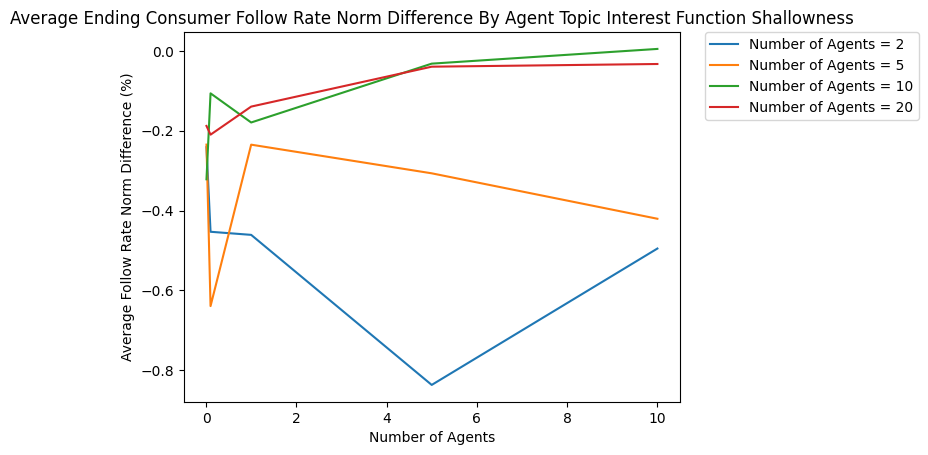

In [30]:
if test_imperfect:
    plt.figure()
    plt.title(f"Average Ending Consumer Follow Rate Norm Difference By {second_param_x_label}")
    plt.xlabel(first_param_x_label)
    plt.ylabel("Average Follow Rate Norm Difference (%)")
    for first_param_value in first_param_values:
        perfect_info_stats: list[TestStats] = first_param_stats[first_param_value]['perfect']
        imperfect_info_stats = first_param_stats[first_param_value]['imperfect']

        avg_follow_rate_norm_diffs = []

        for i in range(len(perfect_info_stats)):
            perfect_stat: TestStats = perfect_info_stats[i]
            imperfect_stat: TestStats = imperfect_info_stats[i]

            avg_follow_rate_norm_diff = 0

            for index in perfect_stat.consumer_stats:
                perfect_consumer_stat = perfect_stat.consumer_stats[index]
                imperfect_consumer_stat = imperfect_stat.consumer_stats[index]

                ending_follow_rate_norm_diff = (np.linalg.norm(perfect_consumer_stat.following_rates[-1]) - np.linalg.norm(imperfect_consumer_stat.following_rates[-1])) / np.linalg.norm(perfect_consumer_stat.following_rates[-1]) * 100
                avg_follow_rate_norm_diff += ending_follow_rate_norm_diff
            
            avg_follow_rate_norm_diff /= len(perfect_stat.consumer_stats)
            avg_follow_rate_norm_diffs.append(avg_follow_rate_norm_diff)
        
        plt.plot(second_param_values, avg_follow_rate_norm_diffs, label=f'{first_param_legend_label} = {first_param_value}')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

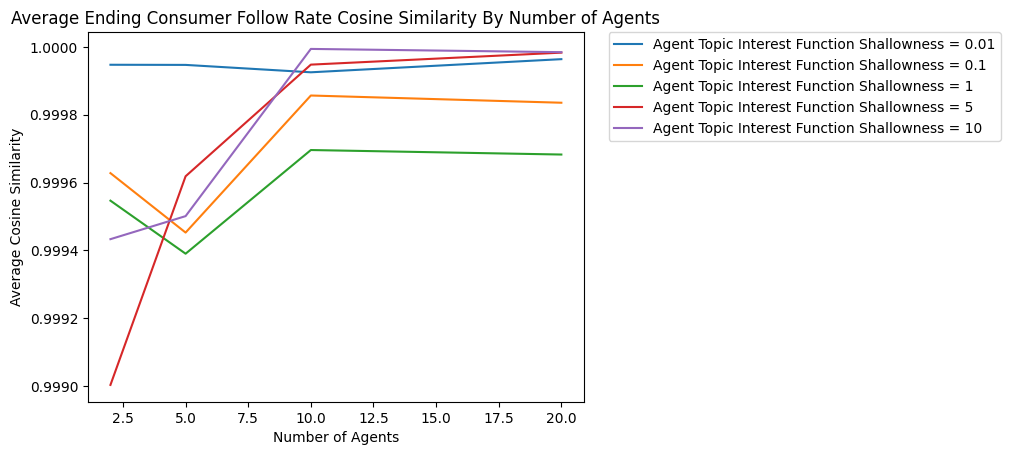

In [31]:
if test_imperfect:
    plt.figure()
    plt.title(f"Average Ending Consumer Follow Rate Cosine Similarity By {first_param_x_label}")
    plt.xlabel(first_param_x_label)
    plt.ylabel("Average Cosine Similarity")
    for second_param_value in second_param_values:
        perfect_info_stats: list[TestStats] = second_param_stats[second_param_value]['perfect']
        imperfect_info_stats = second_param_stats[second_param_value]['imperfect']

        avg_follow_rate_sims = []

        for i in range(len(perfect_info_stats)):
            perfect_stat: TestStats = perfect_info_stats[i]
            imperfect_stat: TestStats = imperfect_info_stats[i]

            avg_follow_rate_sim = 0

            for index in perfect_stat.consumer_stats:
                perfect_consumer_stat = perfect_stat.consumer_stats[index]
                imperfect_consumer_stat = imperfect_stat.consumer_stats[index]

                ending_follow_rate_sim = np.dot(perfect_consumer_stat.following_rates[-1], imperfect_consumer_stat.following_rates[-1]) / (np.linalg.norm(perfect_consumer_stat.following_rates[-1]) * np.linalg.norm(imperfect_consumer_stat.following_rates[-1]))
                avg_follow_rate_sim += ending_follow_rate_sim
            
            avg_follow_rate_sim /= len(perfect_stat.consumer_stats)
            avg_follow_rate_sims.append(avg_follow_rate_sim)
        
        plt.plot(first_param_values, avg_follow_rate_sims, label=f'{second_param_legend_label} = {second_param_value}')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()

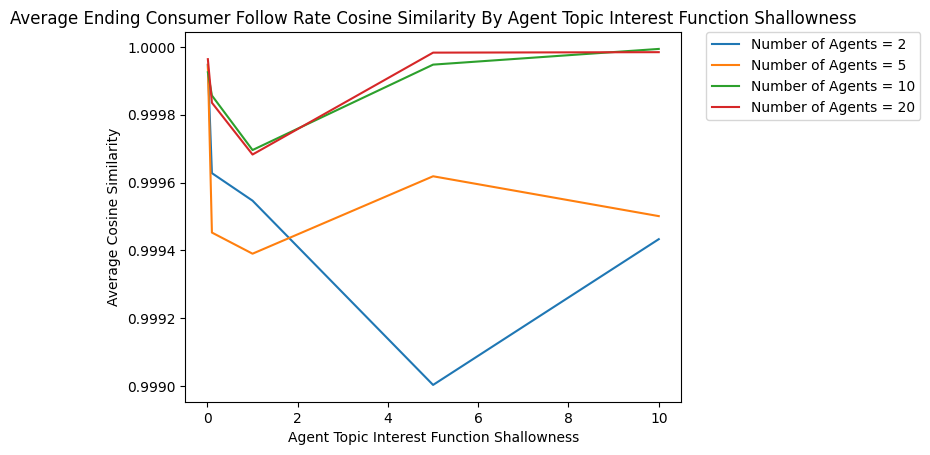

In [32]:
if test_imperfect:
    plt.figure()
    plt.title(f"Average Ending Consumer Follow Rate Cosine Similarity By {second_param_x_label}")
    plt.xlabel(second_param_x_label)
    plt.ylabel("Average Cosine Similarity")
    for first_param_value in first_param_values:
        perfect_info_stats: list[TestStats] = first_param_stats[first_param_value]['perfect']
        imperfect_info_stats = first_param_stats[first_param_value]['imperfect']

        avg_follow_rate_sims = []

        for i in range(len(perfect_info_stats)):
            perfect_stat: TestStats = perfect_info_stats[i]
            imperfect_stat: TestStats = imperfect_info_stats[i]

            avg_follow_rate_sim = 0

            for index in perfect_stat.consumer_stats:
                perfect_consumer_stat = perfect_stat.consumer_stats[index]
                imperfect_consumer_stat = imperfect_stat.consumer_stats[index]

                ending_follow_rate_sim = np.dot(perfect_consumer_stat.following_rates[-1], imperfect_consumer_stat.following_rates[-1]) / (np.linalg.norm(perfect_consumer_stat.following_rates[-1]) * np.linalg.norm(imperfect_consumer_stat.following_rates[-1]))
                avg_follow_rate_sim += ending_follow_rate_sim
            
            avg_follow_rate_sim /= len(perfect_stat.consumer_stats)
            avg_follow_rate_sims.append(avg_follow_rate_sim)
        
        plt.plot(second_param_values, avg_follow_rate_sims, label=f'{first_param_legend_label} = {first_param_value}')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()